In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_test)

10000

In [6]:
X_train[120]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,   7,  13, 117, 191,
         76,   7,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

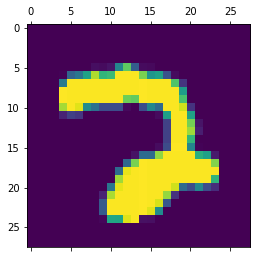

In [7]:
plt.matshow(X_train[120])

In [8]:
y_train[120]

2

In [9]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_flat = X_train.reshape(len(X_train), 28*28)
X_TestFlat = X_test.reshape(len(X_test), 28*28)

In [19]:
X_flat.shape

(60000, 784)

In [20]:
X_flat[120]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.fit(X_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7192 - accuracy: 0.8122
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.9136
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2850 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2767 - accuracy: 0.9225
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2674 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2519 - accuracy: 0.9292
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2539 - accuracy: 0.9294
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2524 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2478 - accuracy: 0.9318
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.243

In [27]:
model.evaluate(X_TestFlat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9277


[0.2646530568599701, 0.9276999831199646]

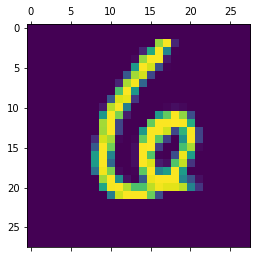

In [33]:
plt.matshow(X_test[123])

In [30]:
y_predict = model.predict(X_TestFlat)

In [34]:
y_predict[123]

array([4.3760072e-05, 8.5307201e-03, 1.0231962e-01, 5.0045229e-03,
       8.6722218e-02, 2.8881643e-02, 9.7960711e-01, 8.7597018e-06,
       4.6145041e-03, 1.4162078e-04], dtype=float32)

In [35]:
np.argmax(y_predict[123])

6

In [ ]:
tf.math.confusion_matrix(labels=y_test, predictions=y_predict)